<a href="https://colab.research.google.com/github/ahmadSum1/MIR_Machine_Learning_PARIS_Sebastien/blob/dev_class1/MIRs1_ML_Exercice1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

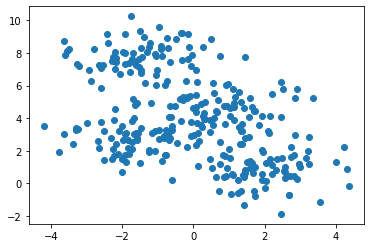

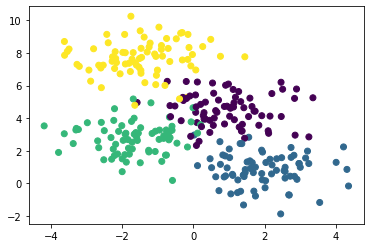

In [5]:
X, y= make_blobs(n_samples=300, centers=4, n_features=2, random_state=0)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.figure(1)
plt.scatter(X[:,0], X[:,1])
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=y)

**Task 1**  [Minkowski Distance](https://arifromadhan19.medium.com/understanding-clustering-in-unsupervised-learning-b0d7a5f61f03)

In [11]:
def  calc_Lq(x1 , x2 , q):
  return (np.sum((np.abs(x1-x2))**q))**(1/q)

VARIFY Task 1

In [12]:
#test
# X1 = np.array([4,8])
# X2 = np.array([6,2])
# calc_Lq(X1,X2,1)

In [13]:
X1 = np.array(X[0,:])
X2 = np.array(X[1,:])

calc_Lq(X1,X2,2)

4.442211434485271




**Task 2: Assign the each point to the nearest cluster**  

In [19]:
def update_assignation(X,U,q=1):
  A = []
  for i in range(X.shape[0]):
    dist = np.zeros(U.shape[1])
    for j in range(U.shape[0]):
      dist[j] = calc_Lq(X[i,:],U[j,:],q)
    A.append(np.argmin(dist))
  return A

VARIFY Task 2

In [20]:
U = np.random.randint(1,10,(4,2))
y1 = update_assignation(X,U,1)
plt.scatter(X[:,0], X[:,1], c=y)

IndexError: ignored

**3**

In [ ]:
def update_centroid(X,a,K):
  d= X.shape[1]
  U = np.zeros(K,d)
  counts = np.zeros(k)
  for i in range(X.shape[0]):
    for j in range(K):
      if a[i]==K[j]:
        U[j,:]+=X[i,:]
        counts[j] +=1
  return U/counts

**4**



In [ ]:
def  compute_Kmeans_loss(X,U,a,q):
  